# Asia Pacific Bids Histogram
 Histograma aproximado con Presto

In [1]:
from stats_util import get_presto_bidrate_histogram, get_stats
%matplotlib inline
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.ticker import FuncFormatter
import numpy as np
import math

x_silver, y_silver = get_presto_bidrate_histogram(24,"20181220","20181225",'ap-southeast-1')
x, y = get_presto_bidrate_histogram(24,"20181213","20181218",'ap-southeast-1')
"done"

'done'

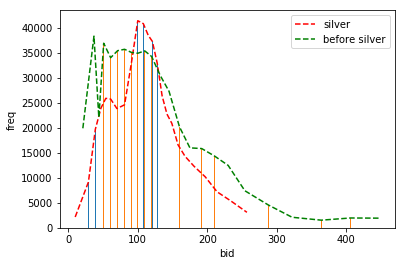

In [2]:
def millions(x, pos):
    'The two args are the value and tick position'
    return '$%1.1fM' % (x * 1e-6)

plt.bar(x_silver, y_silver)
plt.plot(x_silver, y_silver,'r--', label="silver")

plt.bar(x, y)
plt.plot(x, y,'g--', label="before silver")

plt.xlabel('bid')
plt.ylabel('freq')
plt.legend()
plt.show()


In [3]:
s_mean, s_var= get_stats(x_silver, y_silver)
mean, var= get_stats(x, y)

"silver"+ str( (s_mean,s_var) ) +"  no_silver"+str((mean,var)) 
                                                                                 
                                                                                 

'silver(108.61910733647943, 44.66133942542555)  no_silver(107.86498561829747, 65.86158057593316)'

  ### Use Chi Square Test
Determine whether there is a significant difference between the expected frequencies and the observed frequencies in one or more categories.

H0: Both distribution frequencies of Non-Silver and Silver are equals
H1: Samples form Silver and Non-Silver belongs to two diferent distributions

PD: try  Kolmogorov–Smirnov test 


In [4]:
from scipy import stats


dice = np.array([np.array(y)/1000,np.array(y_silver)/1000])
stats.chi2_contingency(dice)
chi2_stat, p_val, dof, ex = stats.chi2_contingency(dice)
chi2_stat, p_val, dof, ex


(70.7542638774492,
 9.295652566058685e-07,
 23,
 array([[11.03706424, 23.74721401, 20.90556874, 30.42605544, 29.96853205,
         30.59456406, 29.78302257, 29.84552577, 34.02173926, 38.41496385,
         37.55391983, 34.53976574, 32.29765112, 26.563858  , 21.20508405,
         19.29948663, 17.64440202, 14.533743  , 10.85905514,  8.42643078,
          6.15531467,  4.36772329,  3.66318727,  2.51312848],
        [11.03593576, 23.74478599, 20.90343126, 30.42294456, 29.96546795,
         30.59143594, 29.77997743, 29.84247423, 34.01826074, 38.41103615,
         37.55008017, 34.53623426, 32.29434888, 26.561142  , 21.20291595,
         19.29751337, 17.64259798, 14.532257  , 10.85794486,  8.42556922,
          6.15468533,  4.36727671,  3.66281273,  2.51287152]]))